In [1]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anupshende000","key":"db329eed07940de03bbd70bb95cae255"}'}

In [2]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d sarthakvajpayee/ai-indian-license-plate-recognition-data


Dataset URL: https://www.kaggle.com/datasets/sarthakvajpayee/ai-indian-license-plate-recognition-data
License(s): unknown
  0% 0.00/1.50M [00:00<?, ?B/s]
100% 1.50M/1.50M [00:00<00:00, 818MB/s]


In [4]:
!unzip -q ai-indian-license-plate-recognition-data.zip -d /content/

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report
import os
import cv2

# Data augmentation

In [6]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    shear_range=0.1
)


In [7]:
val_datagen = ImageDataGenerator(
    rescale=1./255
)


In [8]:
IMG_SIZE = (32, 32)
BATCH_SIZE = 32

train_generator = train_datagen.flow_from_directory(
    "data/data/train",
    target_size=IMG_SIZE,
    color_mode="grayscale",
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=True
)



Found 864 images belonging to 36 classes.


In [9]:

val_generator = val_datagen.flow_from_directory(
    "data/data/val",
    target_size=IMG_SIZE,
    color_mode="grayscale",
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

Found 216 images belonging to 36 classes.


(np.float64(-0.5), np.float64(31.5), np.float64(31.5), np.float64(-0.5))

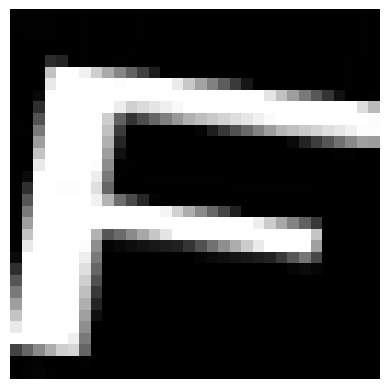

In [10]:
x, y = next(train_generator)

plt.imshow(x[5].squeeze(), cmap="gray")
plt.axis("off")


## Model training-1

In [11]:
model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(32,32,1)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation="relu"),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(36, activation="softmax")
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


In [13]:
early_stop = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

checkpoint = ModelCheckpoint(
    "char_recognition_cnn.h5",
    monitor="val_accuracy",
    save_best_only=True
)    # Best model will be saved

In [14]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    callbacks=[early_stop, checkpoint]
)


Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/27 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.0250 - loss: 3.5804

27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - accuracy: 0.0262 - loss: 3.5780 - val_accuracy: 0.1620 - val_loss: 3.4136
Epoch 2/30
25/27 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.1151 - loss: 3.3225

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.1187 - loss: 3.3046 - val_accuracy: 0.3287 - val_loss: 2.3627
Epoch 3/30
25/27 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.2431 - loss: 2.6330

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.2460 - loss: 2.6141 - val_accuracy: 0.6667 - val_loss: 1.3896
Epoch 4/30
25/27 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3517 - loss: 2.1383

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.3550 - loss: 2.1244 - val_accuracy: 0.7870 - val_loss: 0.9538
Epoch 5/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.4865 - loss: 1.5898 - val_accuracy: 0.7593 - val_loss: 0.7120
Epoch 6/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5556 - loss: 1.3991

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.5564 - loss: 1.3959 - val_accuracy: 0.8843 - val_loss: 0.4922
Epoch 7/30
25/27 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6572 - loss: 1.1222

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.6558 - loss: 1.1261 - val_accuracy: 0.8889 - val_loss: 0.4447
Epoch 8/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.6487 - loss: 1.1192 - val_accuracy: 0.8889 - val_loss: 0.3911
Epoch 9/30
26/27 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6777 - loss: 0.9009

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.6787 - loss: 0.9013 - val_accuracy: 0.8981 - val_loss: 0.3817
Epoch 10/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7354 - loss: 0.7934

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7357 - loss: 0.7925 - val_accuracy: 0.9120 - val_loss: 0.2574
Epoch 11/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.7704 - loss: 0.6787 - val_accuracy: 0.9120 - val_loss: 0.2165
Epoch 12/30
25/27 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7307 - loss: 0.7982

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.7342 - loss: 0.7926 - val_accuracy: 0.9259 - val_loss: 0.2508
Epoch 13/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.7691 - loss: 0.6526 - val_accuracy: 0.8981 - val_loss: 0.2490
Epoch 14/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8381 - loss: 0.5048

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8373 - loss: 0.5062 - val_accuracy: 0.9398 - val_loss: 0.1744
Epoch 15/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8220 - loss: 0.5105 - val_accuracy: 0.9306 - val_loss: 0.1680
Epoch 16/30
25/27 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8526 - loss: 0.4536

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8500 - loss: 0.4568 - val_accuracy: 0.9491 - val_loss: 0.1527
Epoch 17/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8492 - loss: 0.4174

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8492 - loss: 0.4182 - val_accuracy: 0.9583 - val_loss: 0.1192
Epoch 18/30
25/27 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8324 - loss: 0.4199

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8320 - loss: 0.4238 - val_accuracy: 0.9769 - val_loss: 0.1404
Epoch 19/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8535 - loss: 0.4310 - val_accuracy: 0.9537 - val_loss: 0.1353
Epoch 20/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8282 - loss: 0.4718 - val_accuracy: 0.9583 - val_loss: 0.1382
Epoch 21/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8547 - loss: 0.4078 - val_accuracy: 0.9398 - val_loss: 0.1731
Epoch 22/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8738 - loss: 0.3335 - val_accuracy: 0.9630 - val_loss: 0.1099
Epoch 23/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8946 - loss: 0.3332 - val_accuracy: 0.9537 - val_loss: 0.0897
Epoch 24/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8913 - loss: 0.3184 - val_accuracy: 0.9769 - val_loss: 0.0747
Epoch 25/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8875 - loss: 0.3011 - val_accuracy: 0.9722 - val_l

### Plot for accuracies of model

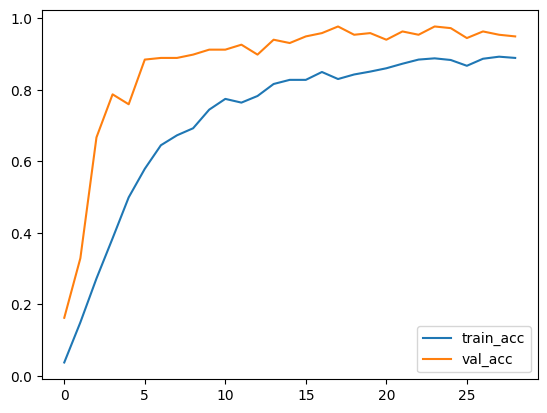

In [15]:

plt.plot(history.history["accuracy"], label="train_acc")
plt.plot(history.history["val_accuracy"], label="val_acc")
plt.legend()
plt.show()


**Performance meterics and classification report**

In [17]:

model_saved = load_model("char_recognition_cnn.h5")


In [18]:
val_loss, val_accuracy = model_saved.evaluate(val_generator)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.9766 - loss: 0.1576


In [20]:

tr_loss, tr_accuracy = model_saved.evaluate(train_generator)


27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9388 - loss: 0.1741


**classification report**

In [24]:

val_generator.reset()
pred_probs_s = model_saved.predict(val_generator)
y_pred_s = np.argmax(pred_probs, axis=1)
y_true_s = val_generator.classes


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step


In [25]:

class_labels = list(val_generator.class_indices.keys())

print(classification_report(y_true_s, y_pred_s, target_names=class_labels))

              precision    recall  f1-score   support

     class_0       0.83      0.83      0.83         6
     class_1       1.00      1.00      1.00         6
     class_2       1.00      1.00      1.00         6
     class_3       1.00      1.00      1.00         6
     class_4       1.00      1.00      1.00         6
     class_5       1.00      1.00      1.00         6
     class_6       1.00      1.00      1.00         6
     class_7       1.00      1.00      1.00         6
     class_8       1.00      0.83      0.91         6
     class_9       1.00      1.00      1.00         6
     class_A       1.00      1.00      1.00         6
     class_B       0.86      1.00      0.92         6
     class_C       1.00      1.00      1.00         6
     class_D       1.00      1.00      1.00         6
     class_E       1.00      1.00      1.00         6
     class_F       1.00      1.00      1.00         6
     class_G       1.00      1.00      1.00         6
     class_H       1.00    

# Using Haar Cascade model for the license plate detection

In [26]:
def enhance_image(img):
    #  Convert to Grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    gray = clahe.apply(gray)

    # Bilateral Filter (Smooths noise but keeps edges sharp)
    gray = cv2.bilateralFilter(gray, 9, 75, 75)

    return gray


In [117]:

# Load cascade
plate_cascade = cv2.CascadeClassifier(
    "haarcascade_russian_plate_number.xml"
)




In [87]:
# Loading the image and preprocessing
img = cv2.imread("/content/sample_4.jpg")
img = cv2.resize(img, (800, int(800 * img.shape[0] / img.shape[1])))
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


In [88]:
plates = plate_cascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(60, 20)
)


In [89]:
plate_img = None
output = img.copy()

for (x, y, w, h) in plates:
    # draw yellow rectangle
    cv2.rectangle(
        output,
        (x, y),
        (x + w, y + h),
        (0, 255, 255),
        3
    )

    # crop plate
    plate_img = img[y:y+h, x:x+w]
    break   # take first detected plate


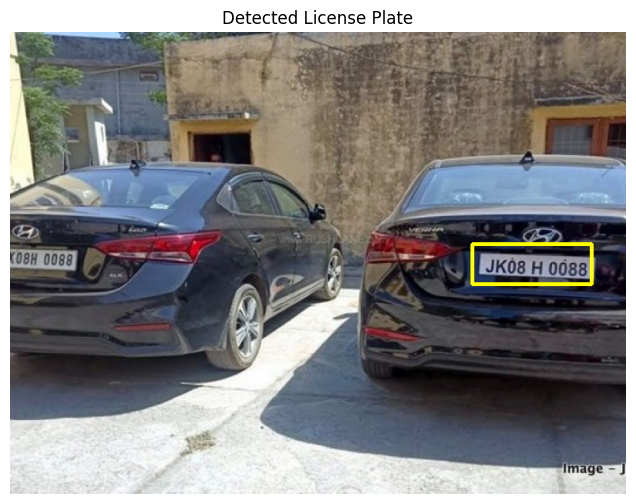

In [90]:
plt.figure(figsize=(8,6))
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.title("Detected License Plate")
plt.axis("off")
plt.show()


**Displaying cropped plate**

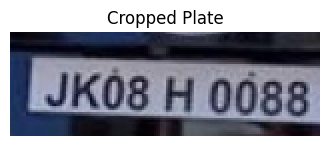

In [91]:
if plate_img is not None:
    plt.figure(figsize=(4,2))
    plt.imshow(cv2.cvtColor(plate_img, cv2.COLOR_BGR2RGB))
    plt.title("Cropped Plate")
    plt.axis("off")
    plt.show()
else:
    print("No plate detected")


array([[[16,  5,  7],
        [14,  3,  5],
        [12,  1,  3],
        ...,
        [51, 43, 44],
        [47, 39, 40],
        [42, 34, 35]],

       [[15,  4,  6],
        [12,  3,  4],
        [10,  2,  3],
        ...,
        [49, 43, 44],
        [44, 38, 39],
        [38, 32, 33]],

       [[21, 10, 10],
        [19,  7,  8],
        [15,  6,  6],
        ...,
        [47, 42, 43],
        [43, 37, 38],
        [39, 33, 34]],

       ...,

       [[86, 54, 31],
        [88, 53, 29],
        [91, 52, 28],
        ...,
        [35, 20, 28],
        [38, 22, 30],
        [39, 22, 29]],

       [[88, 56, 33],
        [88, 53, 29],
        [90, 52, 27],
        ...,
        [36, 24, 33],
        [38, 24, 34],
        [37, 23, 33]],

       [[92, 59, 36],
        [92, 56, 31],
        [93, 53, 28],
        ...,
        [38, 27, 37],
        [40, 28, 39],
        [39, 26, 37]]], dtype=uint8)
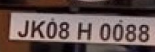

In [92]:
plate_img

### Function to detect the characters in the license plate and bound with the boxes

In [109]:

def segment_characters_debug(image):
    #  Preprocessing
    # Resize to standard height
    img_h, img_w = image.shape[:2]
    new_h = 75
    new_w = int(new_h * (img_w / img_h))
    img = cv2.resize(image, (new_w, new_h))

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply Otsu's Thresholding
    # Characters should be WHITE, Background should be BLACK
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Visualization 1: Checking the binary image
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(gray, cmap='gray')
    plt.title("1. Grayscale (Resized)")

    plt.subplot(1, 3, 2)
    plt.imshow(binary, cmap='gray')
    plt.title("2. Binary ")

    #  Contour Detection
    # Useing RETR_TREE to find nested contours (in case text is inside a border)
    contours, _ = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    #  Filtering & Visualization
    vis_img = img.copy()
    char_list = []

    #  Thresholds
    min_h = 20
    max_h = 70
    min_w = 4
    max_w = 55
    min_area = 50

    print(f"Found {len(contours)} raw contours. Filtering...")

    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        area = w * h

        # Draw ALL contours in RED first (to see what is being detected)
        cv2.rectangle(vis_img, (x, y), (x + w, y + h), (255, 0, 0), 1)

        # Appling Filter
        if min_h < h < max_h and min_w < w < max_w and area > min_area:
            # Draw ACCEPTED contours in GREEN
            cv2.rectangle(vis_img, (x, y), (x + w, y + h), (0, 255, 0), 2)

            # Cropping plate
            char_crop = binary[y:y+h, x:x+w]
            char_crop = cv2.resize(char_crop, (28, 28))
            char_list.append((x, char_crop))
        else:
            # Optional: Print why it failed for larger contours
            if area > 100:
                print(f"Rejected contour at x={x}: h={h} (needs {min_h}-{max_h}), w={w}")

    # Sort
    char_list.sort(key=lambda x: x[0])
    final_chars = [c[1] for c in char_list]

    # Visualization 2: Showing boxes around characters (Red=Reject, Green=Keep)
    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(vis_img, cv2.COLOR_BGR2RGB))
    plt.title(f"3. Detection ")
    plt.show()

    return final_chars


Processing plate...
Found 22 raw contours. Filtering...
Rejected contour at x=165: h=20 (needs 20-70), w=10
Rejected contour at x=147: h=20 (needs 20-70), w=9
Rejected contour at x=70: h=18 (needs 20-70), w=9
Rejected contour at x=0: h=75 (needs 20-70), w=223


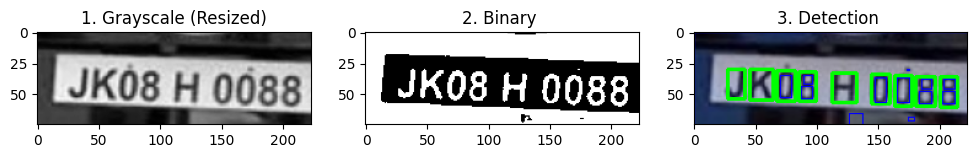


Success! Segmented 9 characters.


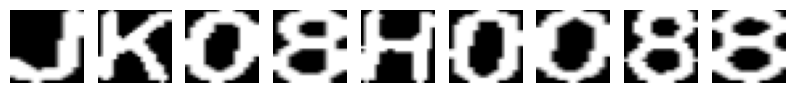

In [114]:
# Displaying segmented characters
if 'plate_img' in locals() and plate_img is not None:
    print("Processing plate..")
    chars = segment_characters_debug(plate_img)

    if len(chars) > 0:
        print(f"\nSuccess! Segmented {len(chars)} characters.")
        # Show the actual characters passed to CNN
        fig, axes = plt.subplots(1, len(chars), figsize=(10, 3))
        if len(chars) == 1: axes = [axes]
        for ax, c in zip(axes, chars):
            ax.imshow(c, cmap='gray')
            ax.axis('off')
        plt.show()
    else:
        print("\n No characters Found.")


### Using a character recognition model(CNN Model) trained earlier to detect the characters from the license plate

In [97]:
# Loading the model
ocr_model = load_model("char_recognition_cnn.h5")

#### Function to detect the text from the plate

In [115]:

char_map = "0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ"

def predict_plate_text(model, character_list):
    plate_string = ""

    for char_img in character_list:

        resized_char_img = cv2.resize(char_img, (32, 32))

        #  Normalize
        img = resized_char_img.astype('float32') / 255.0

        #  Reshape
        img = np.reshape(img, (1, 32, 32, 1))

        #  Predict
        prediction = model.predict(img)

        #  Get index of highest probability
        best_index = np.argmax(prediction)

        # Map index to character
        plate_string += char_map[best_index]

    return plate_string

final_text = predict_plate_text(ocr_model, chars)
print(f"CNN Prediction: {final_text}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
CNN Prediction: JK08H0088


In [99]:
print(final_text)

JK08H0088


*Segmented characters and their predicted value.*


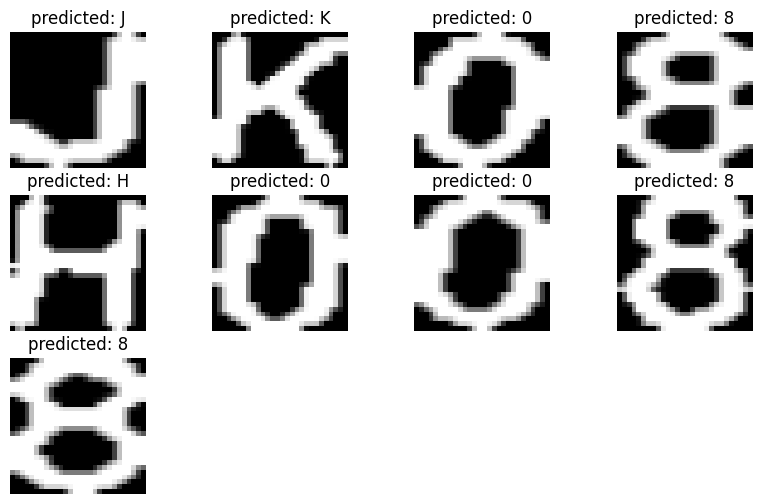

In [116]:
plt.figure(figsize=(10,6))
for i,ch in enumerate(chars):
    img = cv2.resize(ch, (28,28), interpolation=cv2.INTER_AREA)
    plt.subplot(3,4,i+1)
    plt.imshow(img,cmap='gray')
    # Display the predicted character from final_text
    predicted_char = final_text[i] if i < len(final_text) else '?'
    plt.title(f'predicted: {predicted_char}')
    plt.axis('off')
plt.show()